In [85]:
import gym
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
def gather_data(env):
    num_trials = 5000
    min_score = 50
    sim_steps = 2000
    trainingX, trainingY = [], []
    scores = []
    for _ in range (num_trials):
        observations = env.reset()
        score = 0
        training_sampleX, training_sampleY = [], []
        for _ in range(sim_steps):
            action = np.random.randint(0,3)
            one_hot_action = np.zeros(3)
            one_hot_action[action] = 1
            training_sampleX.append(observations)
            training_sampleY.append(one_hot_action)         
            observations, reward, done, _ = env.step(action)      
            score += reward                     
            if(observations[0] >= 0.5):
                print(observations[0])
                print(reward)
                print(done)
                print(score)
                trainingX += training_sampleX[-200:]
                trainingY += training_sampleY[-200:]
                break                            
    trainingX, trainingY = np.array(trainingX), np.array(trainingY)
    return trainingX, trainingY

In [22]:
env = gym.make("MountainCar-v0")

In [23]:
X_test, y_test = [], []

In [52]:
X_test2, y_test2 = [], []

In [74]:
X_test2, y_test2 = gather_data(env)

0.5068410102648468
-1.0
True
-1907.0
0.5129187029307133
-1.0
True
-1129.0
0.502230951807898
-1.0
True
-1756.0
0.5032257226842134
-1.0
True
-1191.0
0.5010210691214418
-1.0
True
-1710.0
0.5070987699023789
-1.0
True
-1247.0
0.5043209456145054
-1.0
True
-878.0
0.5009048829909746
-1.0
True
-1497.0
0.5039255717563819
-1.0
True
-1074.0
0.5050076933004063
-1.0
True
-1502.0
0.5020520469487756
-1.0
True
-1783.0
0.504066639153536
-1.0
True
-1910.0
0.502466724438019
-1.0
True
-1669.0
0.5109112001106516
-1.0
True
-1997.0
0.500321312943873
-1.0
True
-1961.0
0.5046567203349666
-1.0
True
-1933.0
0.5064874287106816
-1.0
True
-1552.0
0.5122269490405039
-1.0
True
-1110.0
0.5045004114270301
-1.0
True
-1711.0
0.5031338817520872
-1.0
True
-1770.0
0.5061256026503118
-1.0
True
-1559.0
0.5137578547262769
-1.0
True
-927.0
0.5098300678514363
-1.0
True
-1842.0
0.5155373861161593
-1.0
True
-1514.0
0.5106264211571732
-1.0
True
-798.0
0.5117093801729541
-1.0
True
-1953.0
0.5002999393732848
-1.0
True
-1842.0
0.503823

In [66]:
X_test, y_test = gather_data(env)

0.508553866875034
-1.0
True
-1329.0
0.5164473980313541
-1.0
True
-1280.0
0.5038366160864274
-1.0
True
-1606.0
0.508980073004767
-1.0
True
-1002.0
0.5007075881200278
-1.0
True
-1874.0
0.5138246064397824
-1.0
True
-1868.0
0.5039771009743531
-1.0
True
-1745.0
0.5045787548781908
-1.0
True
-1358.0
0.5090758817677028
-1.0
True
-1053.0
0.5012607227298375
-1.0
True
-1783.0
0.5054609263120675
-1.0
True
-1360.0
0.5018801221012432
-1.0
True
-659.0
0.5122383414878523
-1.0
True
-1730.0
0.5062868332114928
-1.0
True
-1793.0
0.5019966677758048
-1.0
True
-1128.0
0.5013547752861698
-1.0
True
-1700.0
0.5050363846475946
-1.0
True
-1665.0
0.5007250557522592
-1.0
True
-1043.0
0.5002380409421463
-1.0
True
-805.0
0.5087386457066978
-1.0
True
-1762.0
0.500988186868968
-1.0
True
-1323.0
0.5011962403666715
-1.0
True
-1398.0
0.51614424436462
-1.0
True
-1941.0
0.5008383018259538
-1.0
True
-1100.0
0.5094750929338849
-1.0
True
-1763.0
0.5023359951113671
-1.0
True
-1454.0
0.5057861010327479
-1.0
True
-1853.0
0.513290

In [75]:
X_returned = np.concatenate((X_returned,X_test2), axis=0) 
y_returned = np.concatenate((y_returned,y_test2),axis=0)


In [76]:
print(X_returned.size)
print(y_returned.size)

80000
120000


In [63]:
X_test[0]


array([0.05806044, 0.00938672])

In [64]:
X_returned[0]

array([0.05806044, 0.00938672])

In [97]:
    model = Sequential()
    model.add(Dense(8, input_shape=(2,), activation="relu"))
    #model.add(Dropout(0.8))

    model.add(Dense(16, activation="relu"))
    #model.add(Dropout(0.8))

    model.add(Dense(8, activation="relu"))
   # model.add(Dropout(0.8))

   # model.add(Dense(256, activation="relu"))
   # model.add(Dropout(0.8))

   # model.add(Dense(128, activation="relu"))
   # model.add(Dropout(0.8))
    model.add(Dense(3, activation="softmax"))

    model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [101]:
history = model.fit(X_returned, y_returned, validation_split=0.2, epochs=20, batch_size=50, verbose=1)

Train on 32000 samples, validate on 8000 samples
Epoch 1/20
32000/32000 [==============================] - 2s 51us/sample - loss: 1.0960 - accuracy: 0.3635 - val_loss: 1.0957 - val_accuracy: 0.3671
Epoch 2/20
32000/32000 [==============================] - 1s 43us/sample - loss: 1.0960 - accuracy: 0.3635 - val_loss: 1.0957 - val_accuracy: 0.3671
Epoch 3/20
32000/32000 [==============================] - 1s 43us/sample - loss: 1.0960 - accuracy: 0.3635 - val_loss: 1.0957 - val_accuracy: 0.3671
Epoch 4/20
32000/32000 [==============================] - 1s 43us/sample - loss: 1.0960 - accuracy: 0.3635 - val_loss: 1.0956 - val_accuracy: 0.3671
Epoch 5/20
32000/32000 [==============================] - 1s 43us/sample - loss: 1.0960 - accuracy: 0.3635 - val_loss: 1.0956 - val_accuracy: 0.3671
Epoch 6/20
32000/32000 [==============================] - 1s 43us/sample - loss: 1.0960 - accuracy: 0.3635 - val_loss: 1.0956 - val_accuracy: 0.3671
Epoch 7/20
32000/32000 [==============================] -

In [90]:
history.history

{'loss': [1.0894593148827554,
  1.0846969654858112,
  1.0841011573970318,
  1.083975772470236,
  1.0834834965765476],
 'accuracy': [0.38034374, 0.39109376, 0.38890624, 0.39021876, 0.38990626],
 'val_loss': [1.087600593328476,
  1.08514120388031,
  1.0850614202022553,
  1.0836436729431151,
  1.0845136921405791],
 'val_accuracy': [0.386, 0.3885, 0.386125, 0.3895, 0.385625]}

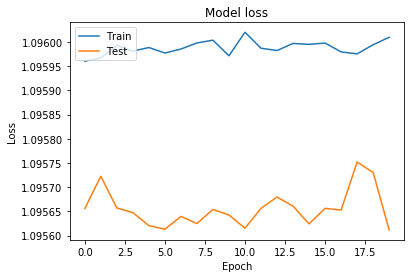

In [102]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()